In [1]:
import pandas as pd

data=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.09.02/GAIT.xlsx')
data_mean=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.09.02/GAIT_mean.xlsx')
print(data_mean.shape)
print(data.shape)

(613, 39)
(613, 38)


In [2]:
print(data.columns)
print(data_mean.columns)

Index(['FORCE_A(Big toe)', 'FORCE_B(Right)', 'FORCE_C(Left)', 'FORCE_D(Heel)',
       'FORCE_E(Little toe)', 'FORCE_F(Center)', 'X COORDINATE_A(Big toe)',
       'X COORDINATE_B(Right)', 'X COORDINATE_C(Left)', 'X COORDINATE_D(Heel)',
       'X COORDINATE_E(Little toe)', 'X COORDINATE_F(Center)',
       'Y COORDINATE_A(Big toe)', 'Y COORDINATE_B(Right)',
       'Y COORDINATE_C(Left)', 'Y COORDINATE_D(Heel)',
       'Y COORDINATE_E(Little toe)', 'Y COORDINATE_F(Center)', 'COPX', 'COPY',
       'FSR DATA_A(Big toe)', 'FSR DATA_B(Right)', 'FSR DATA_C(Left)',
       'FSR DATA_D(Heel)', 'FSR DATA_E(Little toe)', 'FSR DATA_F(Center)',
       'FSR DATA without noise_A(Big toe)', 'FSR DATA without noise_B(Right)',
       'FSR DATA without noise_C(Left)', 'FSR DATA without noise_D(Heel)',
       'FSR DATA without noise_E(Little toe)',
       'FSR DATA without noise_F(Center)', 'FSR DATA_divided mass_A(Big toe)',
       'FSR DATA_B(Right).1', 'FSR DATA_C(Left).1', 'FSR DATA_D(Heel).1',
       'F

In [3]:
data_mean.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
print(data.shape)
print(data_mean.shape)


(613, 38)
(613, 38)


<Axes: >

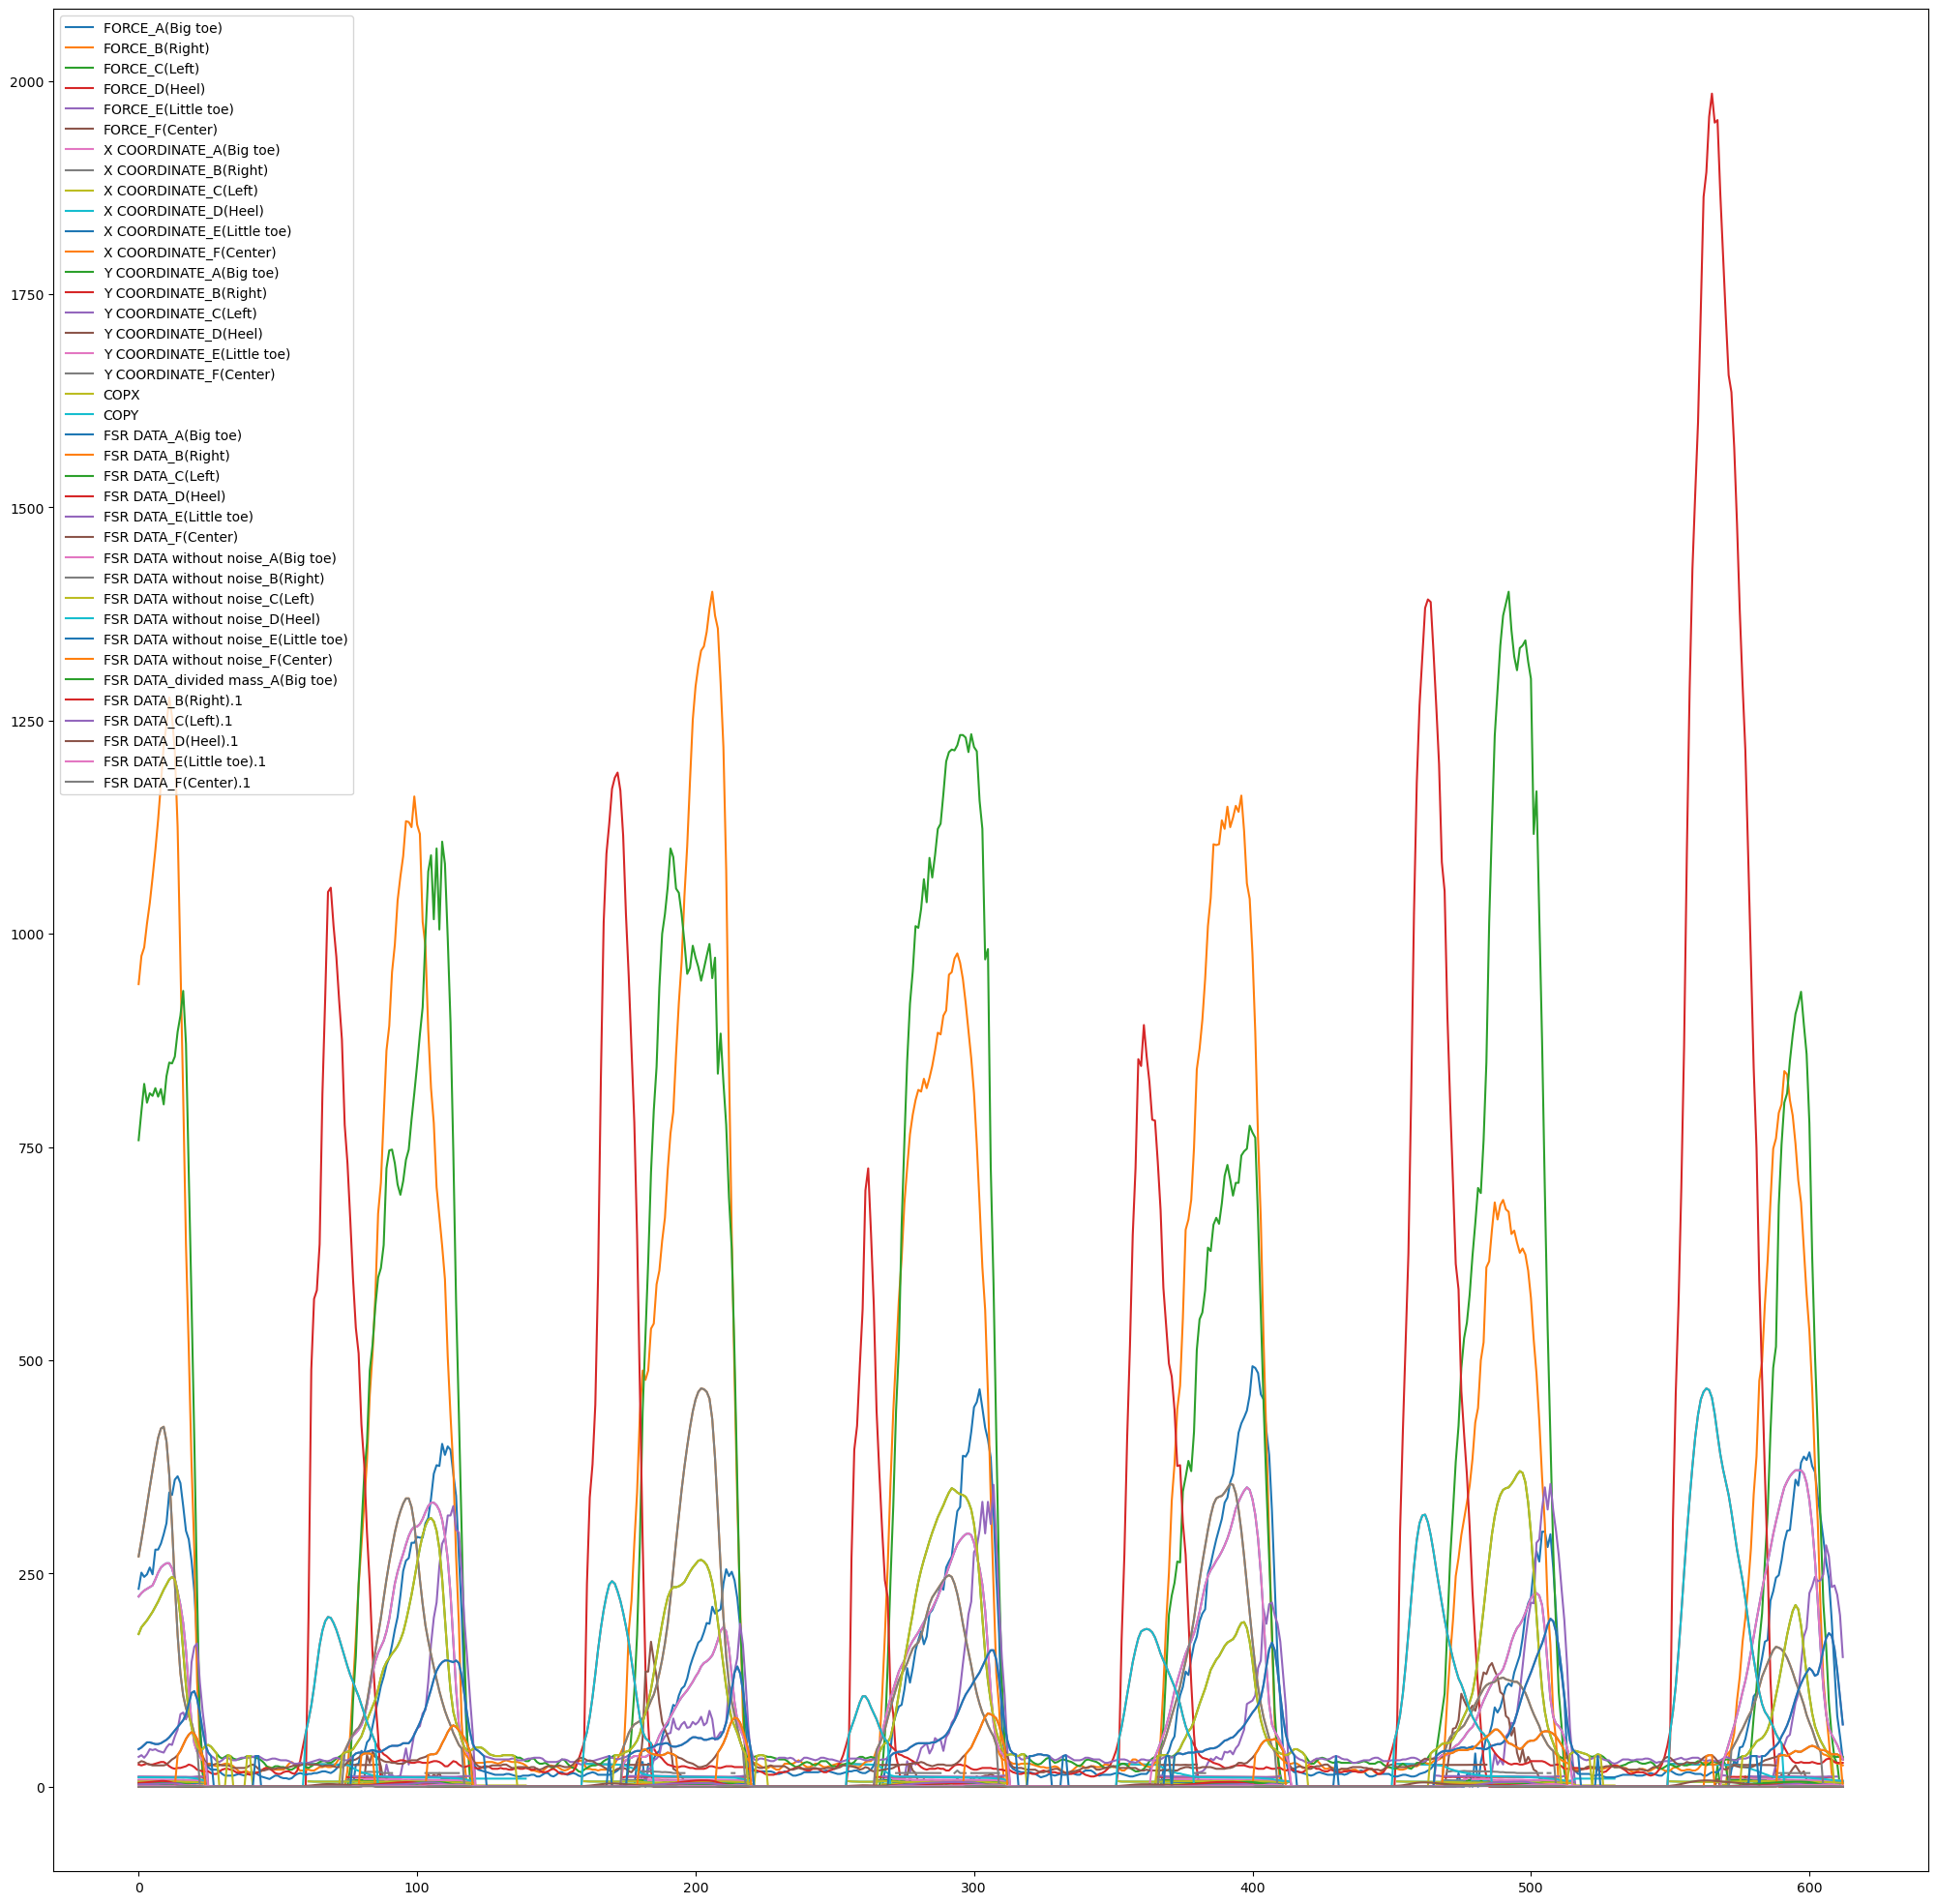

In [6]:
data.plot(figsize=(25,25))

<Axes: >

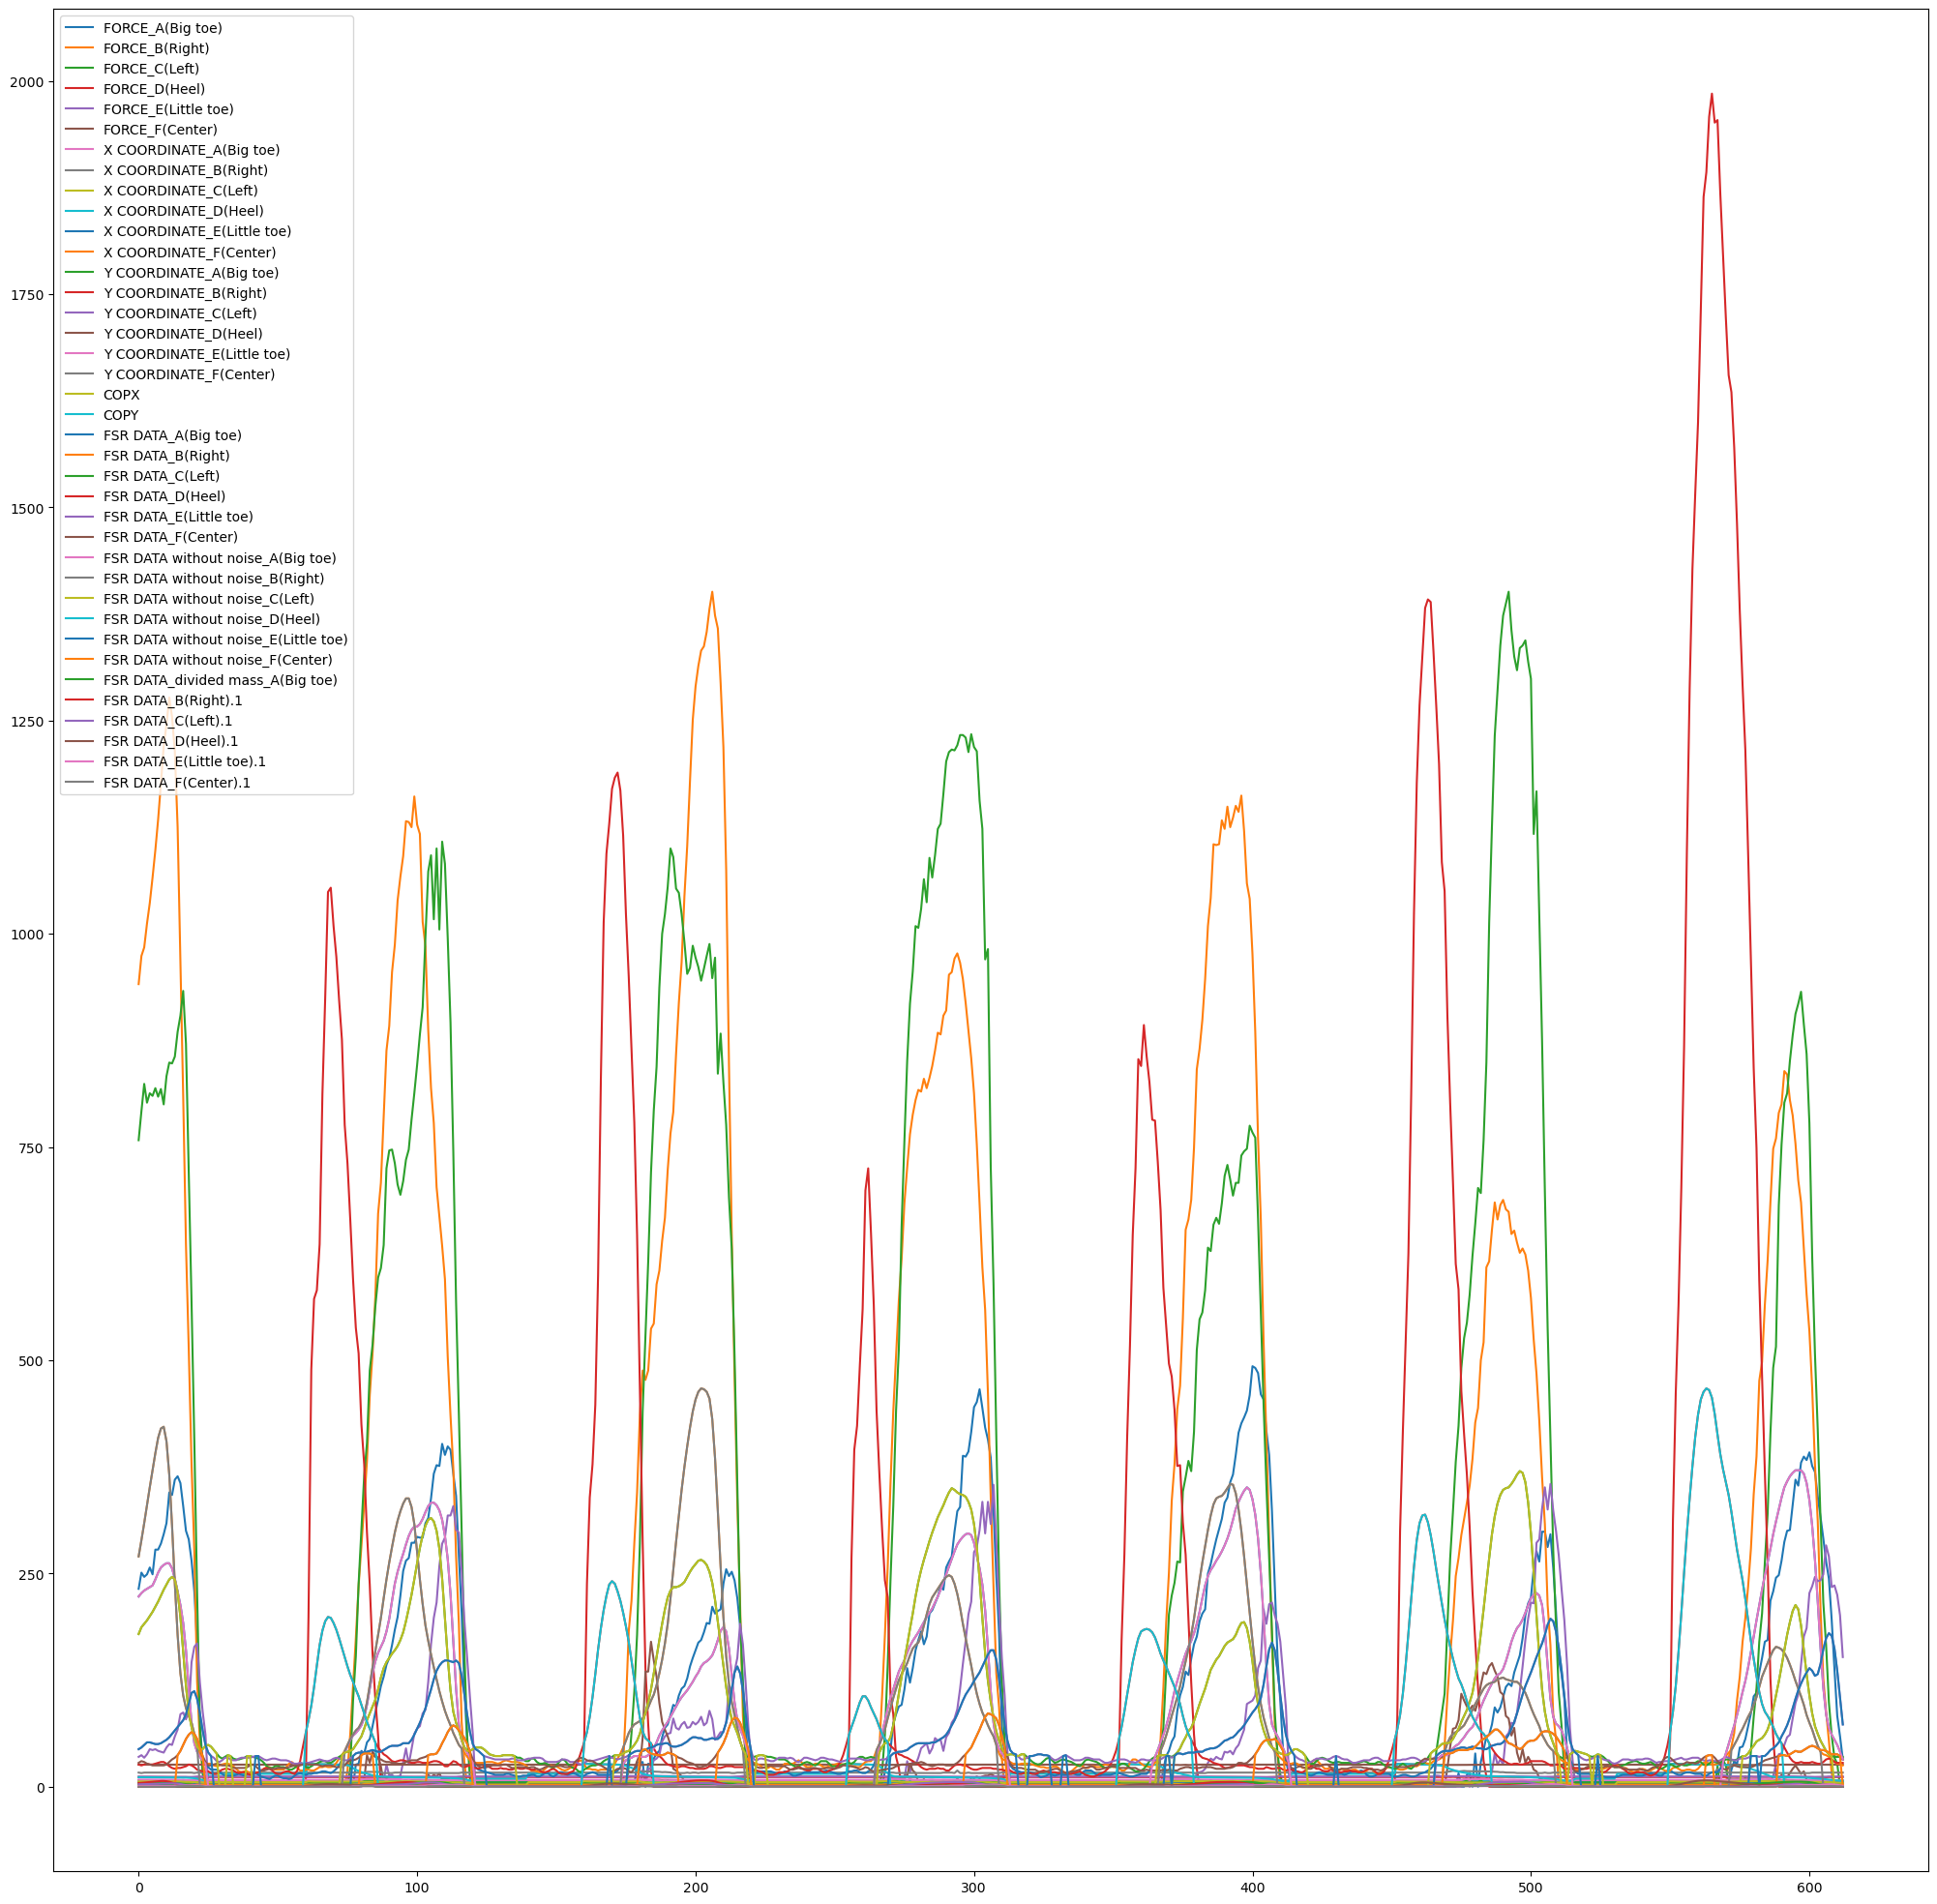

In [8]:
data_mean.plot(figsize=(25,25))

In [9]:
data.isnull().sum()

FORCE_A(Big toe)                          0
FORCE_B(Right)                            0
FORCE_C(Left)                             0
FORCE_D(Heel)                             0
FORCE_E(Little toe)                       0
FORCE_F(Center)                           0
X COORDINATE_A(Big toe)                 335
X COORDINATE_B(Right)                   332
X COORDINATE_C(Left)                    329
X COORDINATE_D(Heel)                    442
X COORDINATE_E(Little toe)              356
X COORDINATE_F(Center)                  476
Y COORDINATE_A(Big toe)                 335
Y COORDINATE_B(Right)                   332
Y COORDINATE_C(Left)                    329
Y COORDINATE_D(Heel)                    442
Y COORDINATE_E(Little toe)              356
Y COORDINATE_F(Center)                  476
COPX                                    186
COPY                                    186
FSR DATA_A(Big toe)                       0
FSR DATA_B(Right)                         0
FSR DATA_C(Left)                

In [10]:
data=data.loc[:,['COPX','COPY']]
data_mean=data_mean.loc[:,['COPX','COPY']]

In [11]:
print(data.isnull().sum())
print(data_mean.isnull().sum())

COPX    186
COPY    186
dtype: int64
COPX    0
COPY    0
dtype: int64


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [13]:
data.shape

(613, 2)

In [25]:
knnr_data_COPX=data.iloc[:,0].copy()
linear_data_COPX=data.iloc[:,0].copy()
rfr_data_COPX=data.iloc[:,0].copy()
svr_data_COPX=data.iloc[:,0].copy()

In [26]:
knnr_data_COPY=data.iloc[:,1].copy()
linear_data_COPY=data.iloc[:,1].copy()
rfr_data_COPY=data.iloc[:,1].copy()
svr_data_COPY=data.iloc[:,1].copy()

In [27]:
data

,COPX,COPY
0,6.140884,11.107484
1,6.108509,11.115201
2,6.092689,11.145991
3,6.151643,11.094366
4,6.177308,11.058567
...,...,...
608,5.245117,7.875977
609,4.944175,7.479369
610,4.594675,7.392012
611,4.728846,6.975000


In [28]:
import numpy as np 


loss_index_COPX=np.array(data.index).reshape(-1,1)[data.iloc[:,0].isna()]
loss_index_COPY=np.array(data.index).reshape(-1,1)[data.iloc[:,1].isna()]

In [29]:
print(loss_index_COPX.shape)
print(loss_index_COPY.shape)

(186, 1)
(186, 1)


In [30]:
index=data.index


normal_index_COPX=np.setdiff1d(index,loss_index_COPX)
normal_index_COPY=np.setdiff1d(index,loss_index_COPY)


In [31]:
x_train_COPX=normal_index_COPX
y_train_COPX=data.iloc[normal_index_COPX,0]
x_test_COPX=loss_index_COPX


x_train_COPY=normal_index_COPY
y_train_COPY=data.iloc[normal_index_COPY,1]
x_test_COPY=loss_index_COPY

In [32]:
knn=KNeighborsRegressor(n_neighbors=7)
lr=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR(kernel='rbf')


In [33]:
knn.fit(np.array(x_train_COPX).reshape(-1,1),np.array(y_train_COPX).reshape(-1,1))
pred=knn.predict(np.array(x_test_COPX).reshape(-1,1))

c=0
for i in loss_index_COPX:    
    knnr_data_COPX.iloc[i]=pred[c]
    c+=1

In [34]:
lr.fit(np.array(x_train_COPX).reshape(-1,1),np.array(y_train_COPX).reshape(-1,1))
pred=lr.predict(np.array(x_test_COPX).reshape(-1,1))

c=0
for i in loss_index_COPX:    
    linear_data_COPX.iloc[i]=pred[c]
    c+=1

In [35]:
rfr.fit(np.array(x_train_COPX).reshape(-1,1),np.array(y_train_COPX).reshape(-1,1))
pred=rfr.predict(np.array(x_test_COPX).reshape(-1,1))

c=0
for i in loss_index_COPX:    
    rfr_data_COPX.iloc[i]=pred[c]
    c+=1

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
svr.fit(np.array(x_train_COPX).reshape(-1,1),np.array(y_train_COPX).reshape(-1,1))
pred=rfr.predict(np.array(x_test_COPX).reshape(-1,1))

c=0
for i in loss_index_COPX:    
    svr_data_COPX.iloc[i]=pred[c]
    c+=1

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
import matplotlib.pyplot as plt

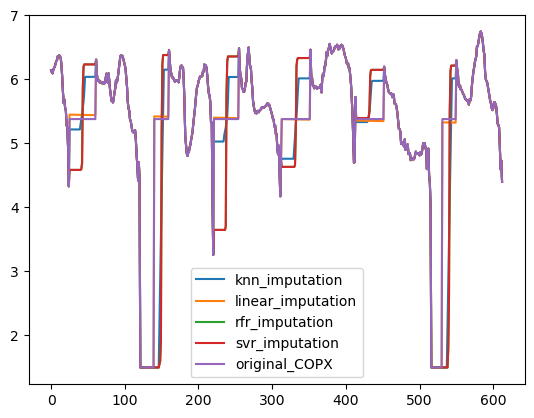

In [40]:
plt.plot(knnr_data_COPX,label='knn_imputation')
plt.plot(linear_data_COPX,label='linear_imputation')
plt.plot(rfr_data_COPX,label='rfr_imputation')
plt.plot(svr_data_COPX,label='svr_imputation')
plt.plot(data_mean.iloc[:,0],label='original_COPX')
plt.legend()

In [41]:
knn=KNeighborsRegressor(n_neighbors=7)
lr=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR(kernel='rbf')


In [45]:
knn.fit(np.array(x_train_COPY).reshape(-1,1),np.array(y_train_COPY).reshape(-1,1))
pred=knn.predict(np.array(x_test_COPY).reshape(-1,1))

c=0
for i in loss_index_COPY:    
    knnr_data_COPY.iloc[i]=pred[c]
    c+=1

In [46]:
lr.fit(np.array(x_train_COPY).reshape(-1,1),np.array(y_train_COPY).reshape(-1,1))
pred=lr.predict(np.array(x_test_COPY).reshape(-1,1))

c=0
for i in loss_index_COPY:    
    linear_data_COPY.iloc[i]=pred[c]
    c+=1

In [47]:
rfr.fit(np.array(x_train_COPY).reshape(-1,1),np.array(y_train_COPY).reshape(-1,1))
pred=rfr.predict(np.array(x_test_COPY).reshape(-1,1))

c=0
for i in loss_index_COPY:    
    rfr_data_COPY.iloc[i]=pred[c]
    c+=1

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [48]:
svr.fit(np.array(x_train_COPY).reshape(-1,1),np.array(y_train_COPY).reshape(-1,1))
pred=rfr.predict(np.array(x_test_COPY).reshape(-1,1))

c=0
for i in loss_index_COPX:    
    svr_data_COPY.iloc[i]=pred[c]
    c+=1

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


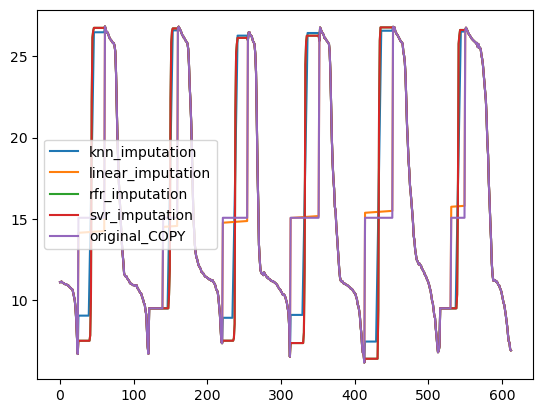

In [49]:
plt.plot(knnr_data_COPY,label='knn_imputation')
plt.plot(linear_data_COPY,label='linear_imputation')
plt.plot(rfr_data_COPY,label='rfr_imputation')
plt.plot(svr_data_COPY,label='svr_imputation')
plt.plot(data_mean.iloc[:,1],label='original_COPY')
plt.legend()